In [1]:
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

2023-11-19 18:20:09.942025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Specify the path to your image dataset
dataset_training_path = "/home/layth/git/mri_analysis/archive/Training/"
dataset_testing_path = "/home/layth/git/mri_analysis/archive/Testing/"

dataset_training_path = "/Users/studentuser/WORKING_BASE/mri_analysis/archive/Training"
dataset_testing_path = "/Users/studentuser/WORKING_BASE/mri_analysis/archive/Testing"

RESIZE = 150
FLAT = RESIZE * RESIZE * 3
classes = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pitutary_tumor'}

In [3]:
# image_size: resizes the images
# batch_size: how many images at a time
# subset: allows me to return a tuple (train_data, val_data)
train_data = image_dataset_from_directory(directory=dataset_training_path,
                                          image_size=(RESIZE, RESIZE),
                                          batch_size=32,
                                          color_mode='grayscale',
                                          seed=42)

testing_data = image_dataset_from_directory(directory=dataset_testing_path,
                                          image_size=(RESIZE, RESIZE),
                                          batch_size=32,
                                          color_mode='grayscale',
                                          seed=42)


X_train = []
y_train = []
X_test = []
y_test = []

# train_data yields batches. I am 'melting' 
# all batches together in one big array
for images, labels in train_data:
  X_train.extend(images.numpy())
  y_train.extend(labels.numpy())
  
for images, labels in testing_data:
  X_test.extend(images.numpy())
  y_test.extend(labels.numpy())

X_train = np.array(X_train) # convert X_train to numpy array
X_train = np.divide(X_train, 255) # rescale pixels
X_train_reshaped = np.reshape(X_train, (np.shape(X_train)[0], RESIZE*RESIZE, 1))
y_train = np.array(y_train)

X_test = np.array(X_test) # convert X_val to numpy array
X_test = np.divide(X_test, 255) # rescale pixels
X_test_reshaped = np.reshape(X_test, (np.shape(X_test)[0], RESIZE*RESIZE, 1))
y_test = np.array(y_test)

print()
print(f"Shape of X_train: {np.shape(X_train)}")
print(f"Shape of X_train_reshaped: {np.shape(X_train_reshaped)}")
print(f"Shape of y_train: {np.shape(y_train)}")
print()
print(f"Shape of X_test: {np.shape(X_test)}")
print(f"Shape of X_test_reshaped: {np.shape(X_test_reshaped)}")
print(f"Shape of y_val: {np.shape(y_test)}")

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


2023-11-19 18:20:16.520304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Shape of X_train: (2870, 150, 150, 1)
Shape of X_train_reshaped: (2870, 22500, 1)
Shape of y_train: (2870,)

Shape of X_test: (394, 150, 150, 1)
Shape of X_test_reshaped: (394, 22500, 1)
Shape of y_val: (394,)


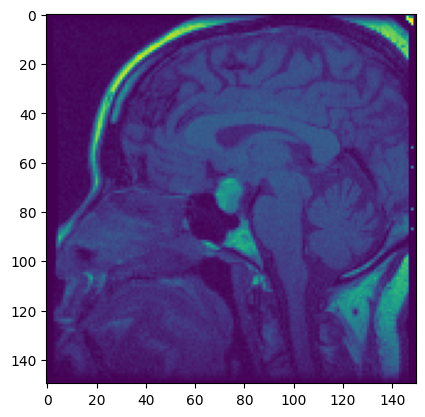

In [4]:
plt.imshow(X_train_reshaped[313].reshape(RESIZE,RESIZE,1))

## KMeans -- grayscale

@ K= 1; Energy= 385.01
@ K= 2; Energy= 180.71
@ K= 3; Energy= 66.80
@ K= 4; Energy= 40.40
@ K= 5; Energy= 25.55
@ K= 6; Energy= 18.56
@ K= 7; Energy= 14.32
@ K= 8; Energy= 10.63
@ K= 9; Energy= 8.46
@ K= 10; Energy= 7.24


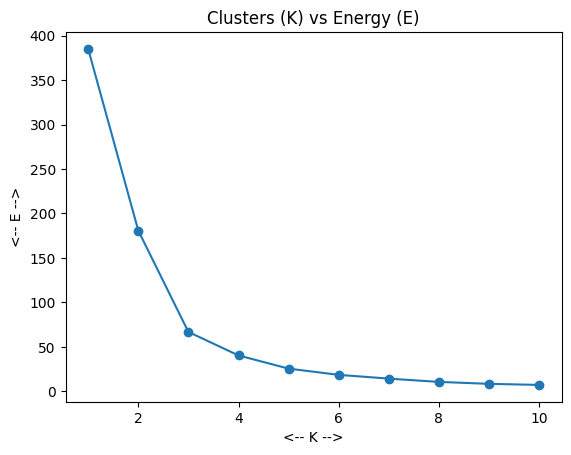

In [5]:
ks = range(1,11) # easily scale your k
k_dict = {} # {k: (Z,C}}
Energy = np.zeros(len(ks)) # init to zeros
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
    kmeans.fit(X_train_reshaped[313]) # fit it on reshaped image
    
    # fetch and save properties
    Z = kmeans.cluster_centers_
    C = kmeans.labels_
    E = kmeans.inertia_
    k_dict[k] = (Z,C,E)
    Energy[k - 1] = E
    
    print(f"@ K= {k}; Energy= {E:.2f}")

plt.plot(ks, Energy, marker='o')
plt.title("Clusters (K) vs Energy (E)")
plt.xlabel("<-- K -->")
plt.ylabel("<-- E -->")
plt.show()

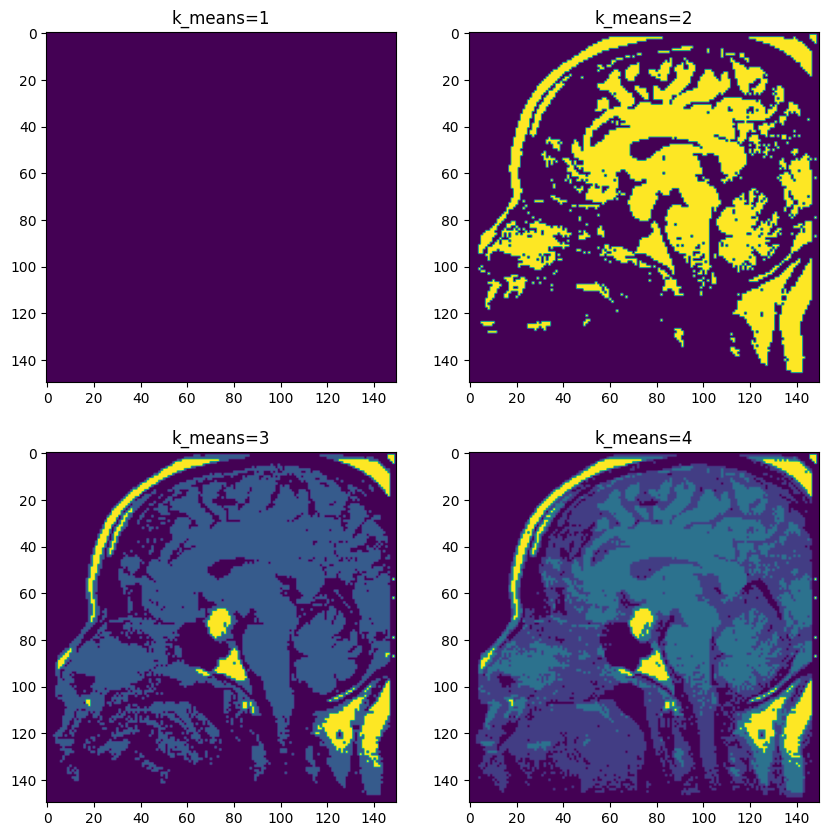

In [6]:
_, ax = plt.subplots(2,2,figsize=(10,10))

for i, k in enumerate(k_dict.values()):
    Z,C,_ = k
    row = i // 2
    col = i % 2
    image313 = Z[C].reshape(RESIZE,RESIZE,1)
    ax[row, col].imshow(image313)
    ax[row, col].set_title(f'k_means={i+1}')
    if i == 3: break

In [7]:
k = 4

kmeaned_X_train = []
for img in X_train_reshaped:
    kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
    kmeans.fit(img) 
    
    # fetch and save properties
    Z = kmeans.cluster_centers_
    C = kmeans.labels_

    kmeaned_X_train.append(Z[C])

kmeaned_X_train = np.array(kmeaned_X_train)
print(np.shape(kmeaned_X_train))

(2870, 22500, 1)


In [8]:
k = 4

kmeaned_X_test = []
for img in X_test_reshaped:
    kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
    kmeans.fit(img) 
    
    # fetch and save properties
    Z = kmeans.cluster_centers_
    C = kmeans.labels_

    kmeaned_X_test.append(Z[C])

kmeaned_X_test = np.array(kmeaned_X_test)
print(np.shape(kmeaned_X_test))

(394, 22500, 1)


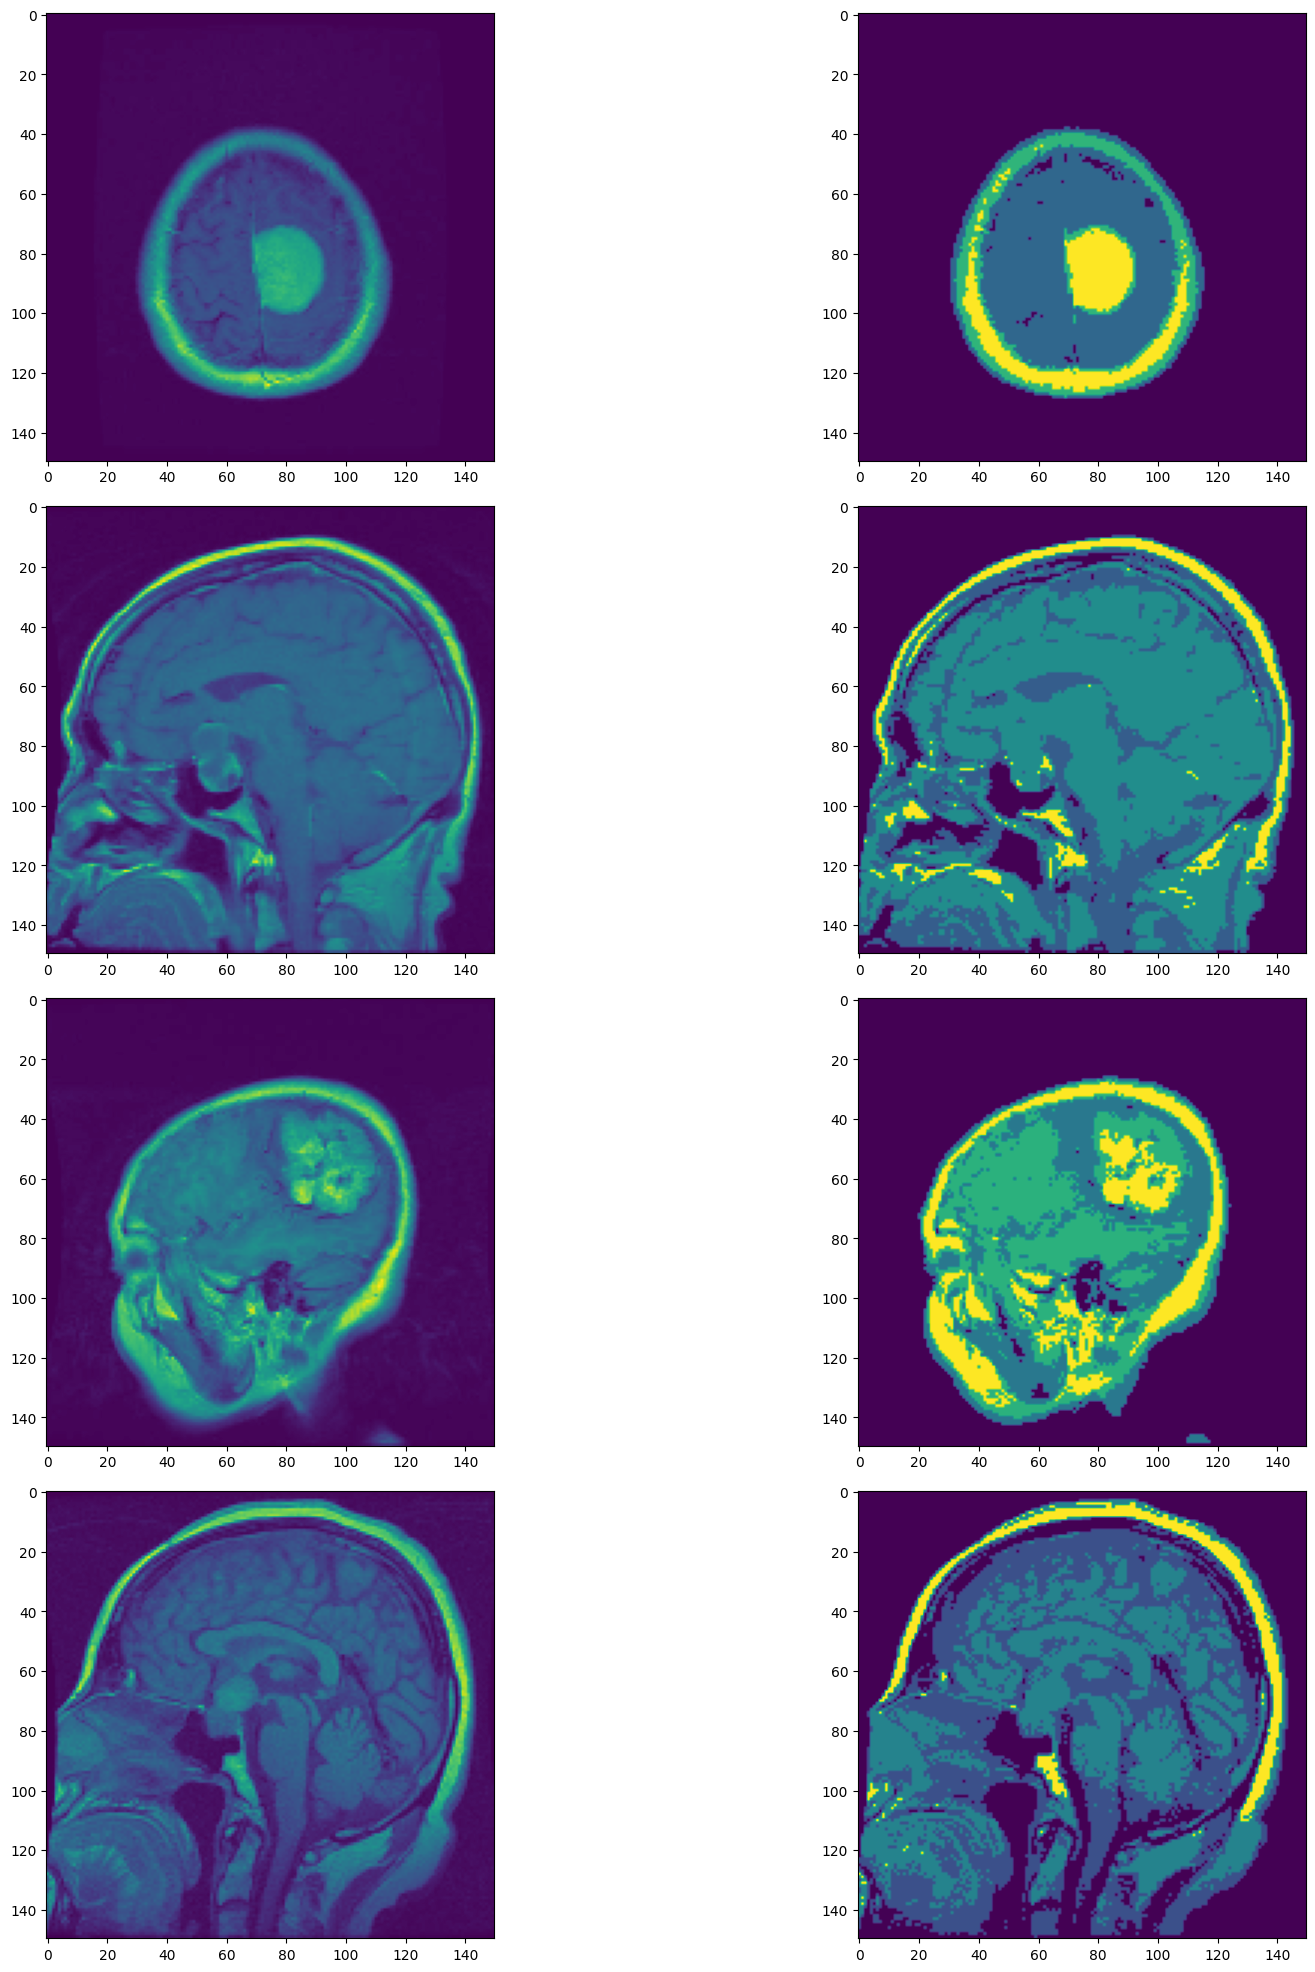

In [9]:
col=2
row=4

fig, ax = plt.subplots(row, col,figsize=(20,25))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for r in range(4):
    img = int(np.random.uniform(0, len(X_train)))
    ax[r, 0].imshow(X_train[img])
    img2 = kmeaned_X_train[img].reshape(RESIZE,RESIZE,1)
    ax[r, 1].imshow(img2)

plt.show()

## KMeans -- rgb

In [10]:
# image_size: resizes the images
# batch_size: how many images at a time
# subset: allows me to return a tuple (train_data, val_data)
train_data = image_dataset_from_directory(directory=dataset_training_path,
                                          image_size=(RESIZE, RESIZE),
                                          batch_size=32,
                                          color_mode='rgb',
                                          seed=42)

testing_data = image_dataset_from_directory(directory=dataset_testing_path,
                                          image_size=(RESIZE, RESIZE),
                                          batch_size=32,
                                          color_mode='rgb',
                                          seed=42)


X_train = []
y_train = []
X_test = []
y_test = []

# train_data yields batches. I am 'melting' 
# all batches together in one big array
for images, labels in train_data:
  X_train.extend(images.numpy())
  y_train.extend(labels.numpy())
  
for images, labels in testing_data:
  X_test.extend(images.numpy())
  y_test.extend(labels.numpy())

X_train = np.array(X_train) # convert X_train to numpy array
X_train = np.divide(X_train, 255) # rescale pixels
X_train_reshaped_rgb = np.reshape(X_train, (np.shape(X_train)[0], RESIZE*RESIZE, 3)) 
y_train = np.array(y_train)

X_test = np.array(X_test) # convert X_val to numpy array
X_test = np.divide(X_test, 255) # rescale pixels
X_test_reshaped_rgb = np.reshape(X_test, (np.shape(X_test)[0], RESIZE*RESIZE, 3)) 
y_test = np.array(y_test)

print()
print(f"Shape of X_train: {np.shape(X_train)}")
print(f"Shape of X_train_reshaped_rgb: {np.shape(X_train_reshaped_rgb)}")
print(f"Shape of y_train: {np.shape(y_train)}")

print()
print(f"Shape of X_test: {np.shape(X_test)}")
print(f"Shape of X_test_reshaped_rgb: {np.shape(X_test_reshaped_rgb)}")
print(f"Shape of y_val: {np.shape(y_test)}")

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.

Shape of X_train: (2870, 150, 150, 3)
Shape of X_train_reshaped_rgb: (2870, 22500, 3)
Shape of y_train: (2870,)

Shape of X_test: (394, 150, 150, 3)
Shape of X_test_reshaped_rgb: (394, 22500, 3)
Shape of y_val: (394,)


@ K= 1; Energy= 1155.02
@ K= 2; Energy= 542.15
@ K= 3; Energy= 200.40
@ K= 4; Energy= 121.18
@ K= 5; Energy= 76.65
@ K= 6; Energy= 55.65
@ K= 7; Energy= 41.31
@ K= 8; Energy= 31.87
@ K= 9; Energy= 25.38
@ K= 10; Energy= 21.62


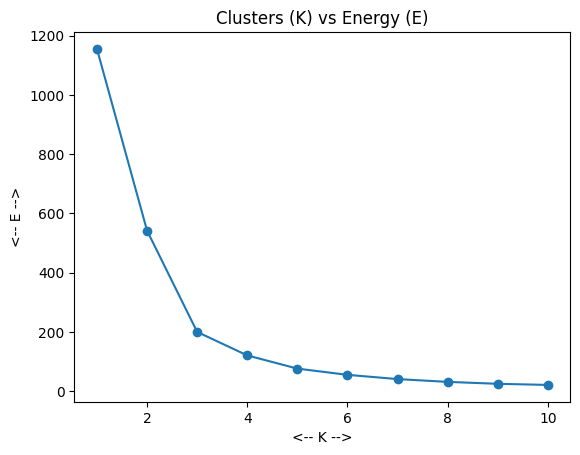

In [11]:
ks = range(1,11) # easily scale your k
k_dict = {} # {k: (Z,C}}
Energy = np.zeros(len(ks)) # init to zeros
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
    kmeans.fit(X_train_reshaped_rgb[313]) # fit it on reshaped image
    
    # fetch and save properties
    Z = kmeans.cluster_centers_
    C = kmeans.labels_
    E = kmeans.inertia_
    k_dict[k] = (Z,C,E)
    Energy[k - 1] = E
    
    print(f"@ K= {k}; Energy= {E:.2f}")

plt.plot(ks, Energy, marker='o')
plt.title("Clusters (K) vs Energy (E)")
plt.xlabel("<-- K -->")
plt.ylabel("<-- E -->")
plt.show()

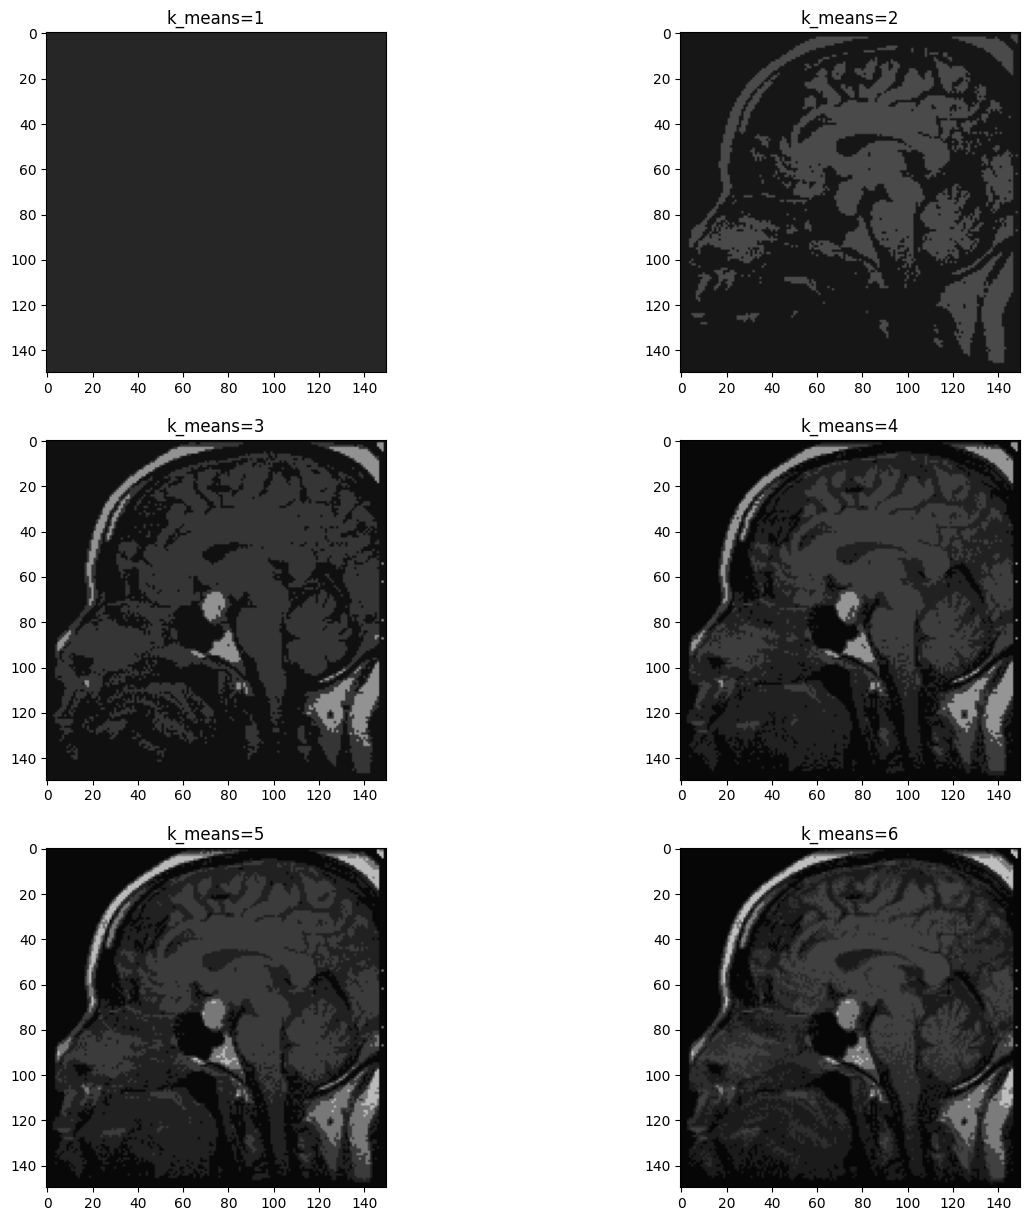

In [12]:
_, ax = plt.subplots(3,2,figsize=(15,15))

for i, k in enumerate(k_dict.values()):
    Z,C,_ = k
    row = i // 2
    col = i % 2
    image313 = Z[C].reshape(RESIZE,RESIZE,3)
    ax[row, col].imshow(image313)
    ax[row, col].set_title(f'k_means={i+1}')
    if i == 5: break

In [17]:
k = 4

kmeaned_X_train_rgb = []
for img in X_train_reshaped_rgb:
    kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
    kmeans.fit(img) 
    
    # fetch and save properties
    Z = kmeans.cluster_centers_
    C = kmeans.labels_

    kmeaned_X_train_rgb.append(Z[C])

kmeaned_X_train_rgb = np.array(kmeaned_X_train_rgb)
print(np.shape(kmeaned_X_train_rgb))

(2870, 22500, 3)


In [18]:
k = 5

kmeaned_X_test_rgb = []
for img in X_test_reshaped_rgb:
    kmeans = KMeans(n_clusters=k, n_init='auto') # create a kmeans
    kmeans.fit(img) 
    
    # fetch and save properties
    Z = kmeans.cluster_centers_
    C = kmeans.labels_

    kmeaned_X_test_rgb.append(Z[C])

kmeaned_X_test_rgb = np.array(kmeaned_X_test_rgb)
print(np.shape(kmeaned_X_test_rgb))

(394, 22500, 3)


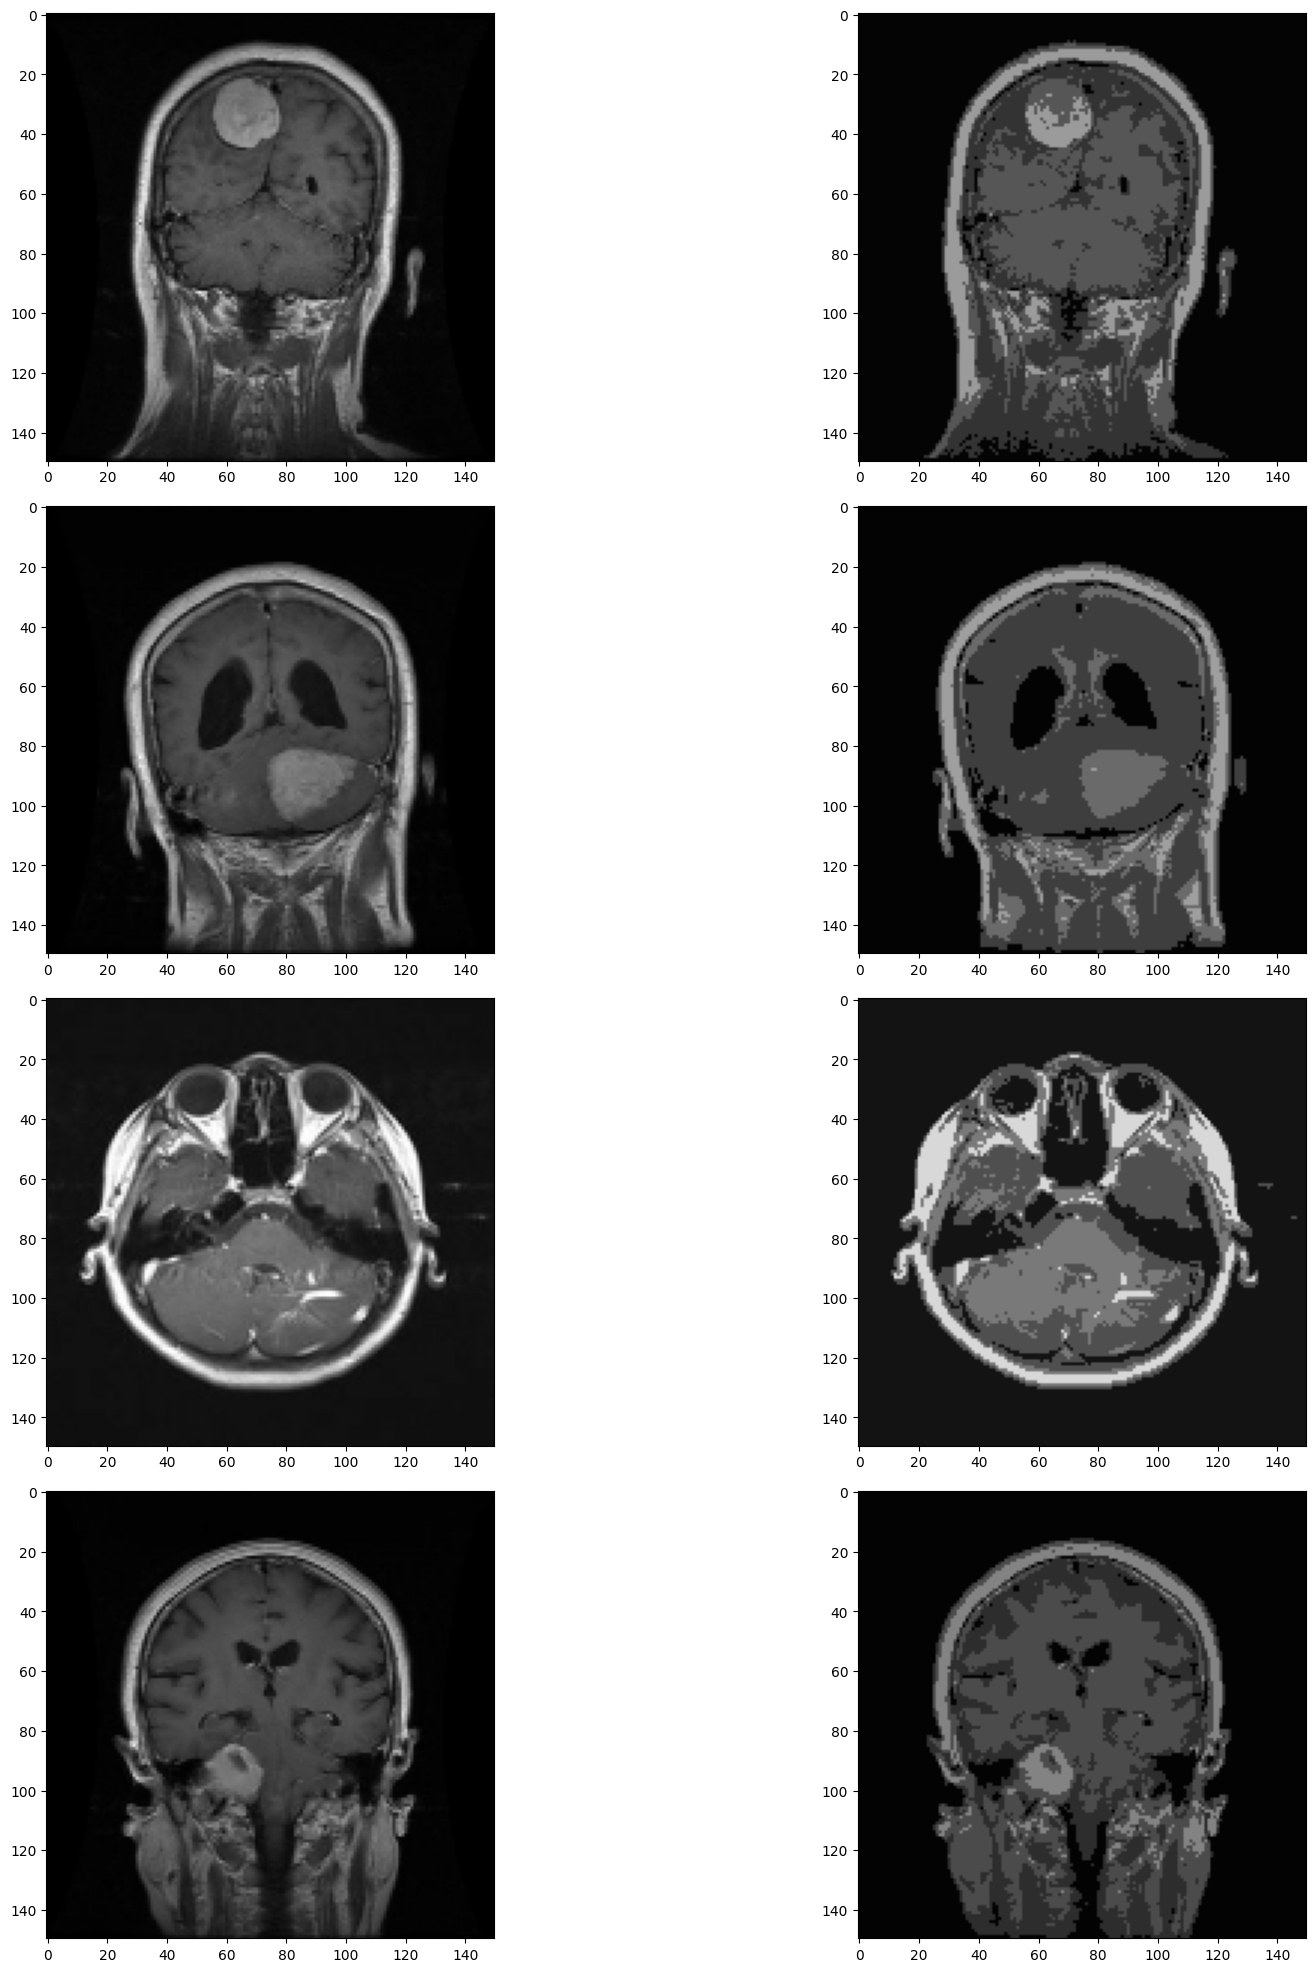

In [19]:
col=2
row=4

fig, ax = plt.subplots(row, col,figsize=(20,25))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for r in range(4):
    img = int(np.random.uniform(0, len(X_train)))
    ax[r, 0].imshow(X_train[img])
    img2 = kmeaned_X_train_rgb[img].reshape(RESIZE,RESIZE,3)
    ax[r, 1].imshow(img2)

plt.show()

## ANN

In [41]:
import tensorflow as tf
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, accuracy_score


In [21]:
print(f"Kmeaned grayscale train data: {np.shape(kmeaned_X_train)}")
print(f"Kmeaned grayscale test data: {np.shape(kmeaned_X_test)}")
print(f"Kmeaned RGB train data: {np.shape(kmeaned_X_train_rgb)}")
print(f"Kmeaned RGB test data: {np.shape(kmeaned_X_test_rgb)}")

Kmeaned grayscale train data: (2870, 22500, 1)
Kmeaned grayscale test data: (394, 22500, 1)
Kmeaned RGB train data: (2870, 22500, 3)
Kmeaned RGB test data: (394, 22500, 3)


In [28]:
Xtrain_grayscale = np.reshape(kmeaned_X_train, (2870, 22500))
Xtest_grayscale = np.reshape(kmeaned_X_test, (394, 22500))
Xtrain_rgb = np.reshape(kmeaned_X_train_rgb, (2870, 67500))
Xtest_rgb = np.reshape(kmeaned_X_test_rgb, (394, 67500))

print(f'Xtrain_grayscale: {np.shape(Xtrain_grayscale)}')
print(f'Xtest_grayscale: {np.shape(Xtest_grayscale)}')

print(f'Xtrain_rgb: {np.shape(Xtrain_rgb)}')
print(f'Xtest_rgb: {np.shape(Xtest_rgb)}')

print(f'ytrain: {np.shape(y_train)}')
print(f'ytest: {np.shape(y_test)}')


Xtrain_grayscale: (2870, 22500)
Xtest_grayscale: (394, 22500)
Xtrain_rgb: (2870, 67500)
Xtest_rgb: (394, 67500)
ytrain: (2870,)
ytest: (394,)


In [31]:
class myCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        self.target_accuracy = target_accuracy
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > self.target_accuracy:
            print(f"\nReached {self.target_accuracy * 100}% accuracy so cancelling training!")
            self.model.stop_training = True    

def graph_accuracy_and_loss(history):
  # list all data in history
  # print(history.history.keys())
  
  _, axes = plt.subplots(1, 2, figsize=(20,10))
  
  # summarize history for accuracy
  axes[0].plot(history.history['accuracy'])
  axes[0].plot(history.history['val_accuracy'])
  axes[0].set_title('model accuracy')
  axes[0].set_ylabel('accuracy')
  axes[0].set_xlabel('epoch')
  axes[0].legend(['train', 'test'], loc='upper left')
  
  # summarize history for loss
  axes[1].plot(history.history['loss'])
  axes[1].plot(history.history['val_loss'])
  axes[1].set_title('model loss')
  axes[1].set_ylabel('loss')
  axes[1].set_xlabel('epoch')
  axes[1].legend(['train', 'test'], loc='upper left')
  
  plt.show()
  
  return None

def model_accuracy_and_confusion_matrix(model, Xtrain, ytrain, Xtest, ytest):
  ypred_train        = model.predict(Xtrain)
  ypred_train        = np.argmax(ypred_train, axis=1)
  accuracy_train     = accuracy_score(ytrain, ypred_train)
  conf_matrix_train  = confusion_matrix(ytrain, ypred_train)
  print(f'Accuracy for training data (R^2): {accuracy_train} \n')
  print('Confusion matrix for training data:\n', conf_matrix_train, '\n')

  ypred_test         = model.predict(Xtest)
  ypred_test         = np.argmax(ypred_test, axis=1)
  accuracy_train     = accuracy_score(ytest, ypred_test)
  conf_matrix_train  = confusion_matrix(ytest, ypred_test)
  print(f'Accuracy for testing data (R^2): {accuracy_train} \n')
  print('Confusion matrix for testing data:\n', conf_matrix_train, '\n')
  return None


In [38]:
model = Sequential(
  [
    Dense(units=128, activation='relu', input_shape=(22500,), name='L0'),
    Dense(units=64, activation='relu', name='L1'),
    Dense(units=32, activation='relu', name='L2'),
    Dense(units=4, activation='linear', name='L3')
  ]
)

model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss=SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L0 (Dense)                  (None, 128)               2880128   
                                                                 
 L1 (Dense)                  (None, 64)                8256      
                                                                 
 L2 (Dense)                  (None, 32)                2080      
                                                                 
 L3 (Dense)                  (None, 4)                 132       
                                                                 
Total params: 2,890,596
Trainable params: 2,890,596
Non-trainable params: 0
_________________________________________________________________


In [39]:
EPOCHS=100 # epochs = iterations
BATCH_SIZE=32
TARGET_ACC=0.96
callbacks = myCallback(target_accuracy=TARGET_ACC)
history = model.fit(Xtrain_grayscale, y_train,
                        validation_split=.15,
                        callbacks=[callbacks],
                        epochs=EPOCHS, 
                        batch_size=BATCH_SIZE,
                        verbose=1)

print(f"\nYour model reached the desired accuracy of after {len(history.epoch)} epochs")

Epoch 1/100
77/77 [==============================] - 3s 33ms/step - loss: 1.9397 - accuracy: 0.3899 - val_loss: 1.4229 - val_accuracy: 0.3341
Epoch 2/100
77/77 [==============================] - 3s 34ms/step - loss: 1.1852 - accuracy: 0.4781 - val_loss: 1.3457 - val_accuracy: 0.4548
Epoch 3/100
77/77 [==============================] - 3s 34ms/step - loss: 1.0727 - accuracy: 0.5510 - val_loss: 1.2179 - val_accuracy: 0.5267
Epoch 4/100
77/77 [==============================] - 3s 34ms/step - loss: 0.9416 - accuracy: 0.5990 - val_loss: 0.9644 - val_accuracy: 0.5545
Epoch 5/100
77/77 [==============================] - 2s 29ms/step - loss: 0.8257 - accuracy: 0.6466 - val_loss: 0.7679 - val_accuracy: 0.7007
Epoch 6/100
77/77 [==============================] - 2s 30ms/step - loss: 0.7444 - accuracy: 0.6925 - val_loss: 0.7838 - val_accuracy: 0.6775
Epoch 7/100
77/77 [==============================] - 2s 28ms/step - loss: 0.6961 - accuracy: 0.6991 - val_loss: 0.8693 - val_accuracy: 0.6450
Epoch 

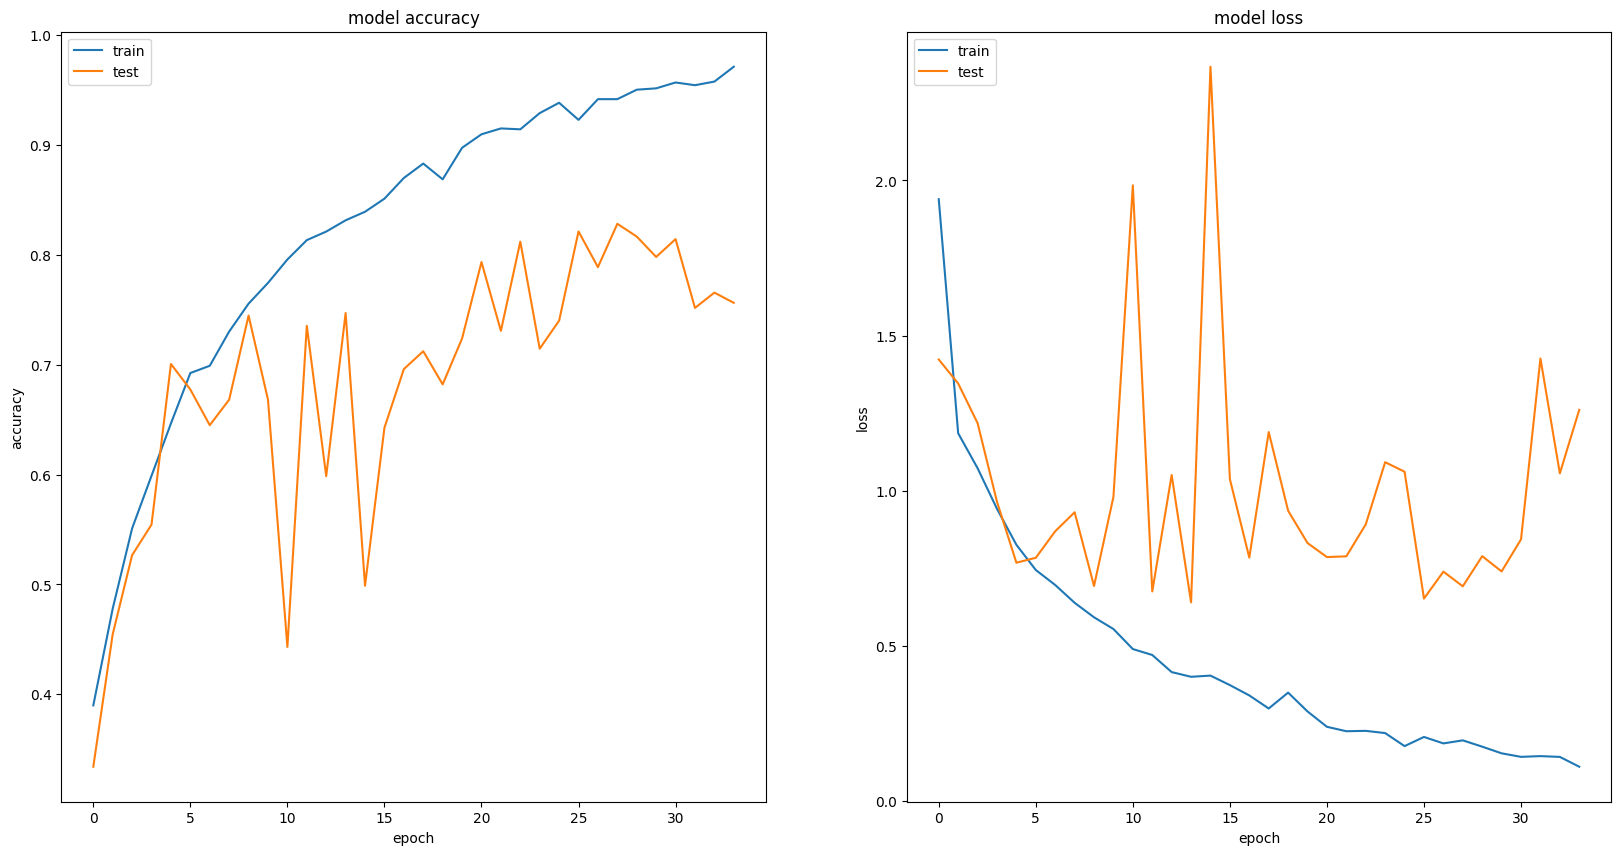

90/90 [==============================] - 1s 9ms/step
Accuracy for training data (R^2): 0.8641114982578397 

Confusion matrix for training data:
 [[501 322   3   0]
 [  1 780  34   7]
 [  1   8 382   4]
 [  0  10   0 817]] 

13/13 [==============================] - 0s 6ms/step
Accuracy for testing data (R^2): 0.5989847715736041 

Confusion matrix for testing data:
 [[10 27 53 10]
 [ 0 89 24  2]
 [ 0  5 99  1]
 [ 0 26 10 38]] 



In [42]:
graph_accuracy_and_loss(history=history)
model_accuracy_and_confusion_matrix(model, Xtrain_grayscale, y_train, Xtest_grayscale, y_test)

In [43]:
model = Sequential(
  [
    Dense(units=128, activation='relu', input_shape=(67500,), name='L0'),
    Dense(units=64, activation='relu', name='L1'),
    Dense(units=32, activation='relu', name='L2'),
    Dense(units=4, activation='linear', name='L3')
  ]
)

model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss=SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L0 (Dense)                  (None, 128)               8640128   
                                                                 
 L1 (Dense)                  (None, 64)                8256      
                                                                 
 L2 (Dense)                  (None, 32)                2080      
                                                                 
 L3 (Dense)                  (None, 4)                 132       
                                                                 
Total params: 8,650,596
Trainable params: 8,650,596
Non-trainable params: 0
_________________________________________________________________


In [44]:
EPOCHS=100 # epochs = iterations
BATCH_SIZE=32
TARGET_ACC=0.96
callbacks = myCallback(target_accuracy=TARGET_ACC)
history = model.fit(Xtrain_rgb, y_train,
                        validation_split=.15,
                        callbacks=[callbacks],
                        epochs=EPOCHS, 
                        batch_size=BATCH_SIZE,
                        verbose=1)

print(f"\nYour model reached the desired accuracy of after {len(history.epoch)} epochs")

Epoch 1/100
77/77 [==============================] - 7s 88ms/step - loss: 4.5917 - accuracy: 0.3563 - val_loss: 2.7064 - val_accuracy: 0.4733
Epoch 2/100
77/77 [==============================] - 6s 80ms/step - loss: 1.8754 - accuracy: 0.4248 - val_loss: 2.6574 - val_accuracy: 0.2947
Epoch 3/100
77/77 [==============================] - 6s 76ms/step - loss: 1.3851 - accuracy: 0.4768 - val_loss: 1.7023 - val_accuracy: 0.3991
Epoch 4/100
77/77 [==============================] - 6s 75ms/step - loss: 1.1238 - accuracy: 0.5260 - val_loss: 1.0210 - val_accuracy: 0.5035
Epoch 5/100
77/77 [==============================] - 6s 74ms/step - loss: 1.0006 - accuracy: 0.5953 - val_loss: 0.9953 - val_accuracy: 0.6218
Epoch 6/100
77/77 [==============================] - 6s 79ms/step - loss: 0.8974 - accuracy: 0.6343 - val_loss: 1.1925 - val_accuracy: 0.5360
Epoch 7/100
77/77 [==============================] - 6s 77ms/step - loss: 0.8352 - accuracy: 0.6552 - val_loss: 1.0283 - val_accuracy: 0.5313
Epoch 

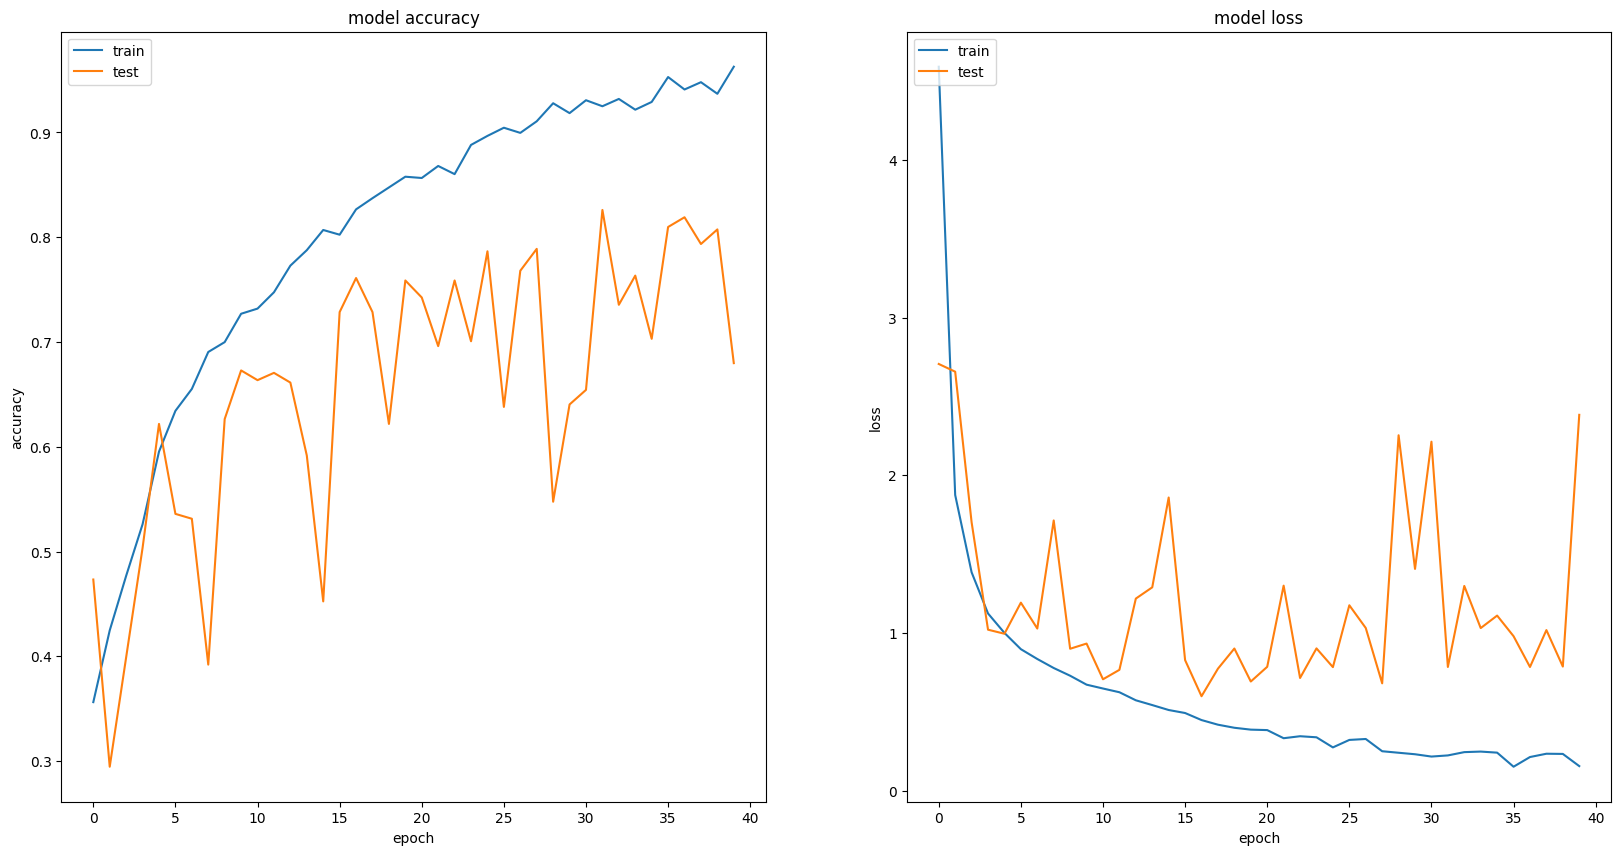

90/90 [==============================] - 1s 15ms/step
Accuracy for training data (R^2): 0.7735191637630662 

Confusion matrix for training data:
 [[621 195   0  10]
 [ 37 783   0   2]
 [  8 338  36  13]
 [  1  46   0 780]] 

13/13 [==============================] - 0s 23ms/step
Accuracy for testing data (R^2): 0.43147208121827413 

Confusion matrix for testing data:
 [[ 12  78   1   9]
 [  3 111   0   1]
 [  4  86  11   4]
 [  4  34   0  36]] 



In [45]:
graph_accuracy_and_loss(history=history)
model_accuracy_and_confusion_matrix(model, Xtrain_rgb, y_train, Xtest_rgb, y_test)